In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xgboost as xgb

from scipy.sparse import hstack
from xgboost.sklearn import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from collections import Counter
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('D:\\web_economics_data\\train.csv')

In [3]:
validation=pd.read_csv('D:\\web_economics_data\\validation.csv')

In [4]:
test=pd.read_csv('D:\\web_economics_data\\test.csv')

In [134]:
train['domain'].value_counts()

5F1RQS9rg5scFsf                     192662
31xSTvprdN1RFt                      138086
ersbQv1RdoTy1m58uG                   80892
trqRTuMvjTN7X9KbuKz                  75043
DFpETuxoGQdcFNKbuKz                  71060
3FKElpuEMusyJqKbuKz                  63618
3FF-e59aG5syJqKbuKz                  44466
5F97t5E0BTK7XhNrUMpENpn              28219
DD1SqS9rg5scFsf                      28137
DDTSQuf0MTTNaqKIvMpENpn              26922
31drTvprdN1RFt                       26237
dd4270481b753dde29898e27c7c03920     25227
trqRTummPvas1m58uG                   20594
3SCYZrn0Qo18XMB4JKTI                 20536
trqRTuN-XIuc1mKYUV                   18947
trqRTvFoMNmIFY5SaMpENpn              18188
trqRTvFRLpscFU                       17954
tK1jlK9rg5scFsf                      17881
20fc675468712705dbf5d3eda94126da     17286
3043163ba84753b4b51dd3290caeae67     17144
trqRTJkrBoq7JsNr5SqfNX               15935
DFpETuFygZl7gspy                     15764
trqRTvpogNlyDok4JKTI                 15176
7ed515fe566

In [50]:
type(train.usertag[0])

str

In [93]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [96]:
train

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,250,FourthView,Na,0,10722,294,23,NaN,2821,NaN
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,90,OtherView,Na,133,7330,277,133,NaN,2259,NaN
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,280,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110"
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,90,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110"
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111"
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,90,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110"
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,90,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110"


In [55]:
train.creative.value_counts()

44966cc8da1ed40c95d59e863c8c75f0    147811
832b91d59d0cb5731431653204a76c0e    133077
86c2543527c86a893d4d4f68810a0416    126157
48f2e9ba15708c0146bda5e1dd653caa    107449
77819d3e0b3467fe5c7b16d68ad923a1    106436
e1af08818a6cd6bbba118bb54a651961     97033
c46090c887c257b61ab1fa11baee91d8     85682
10722                                78307
0cd33fcb336655841d3e1441b915748d     75359
b90c12ed2bd7950c6027bf9c6937c48a     74424
00fccc64a1ee2809348509b7ac2a97a5     57629
cb7c76e7784031272e37af8e7e9b062c     53706
10717                                50878
911b2d84826786018761e8c0b0a3a60c     50726
449a22cd91d9042eda3d3a1b89a22ea8     50549
7323                                 47191
59f065a795a663140e36eec106464524     41741
a10c31a8ff5f42930b4c34035e523886     40054
d01411218cc79bc49d2a4078c4093b76     37611
d881a6c788e76c2c27ed1ef04f119544     37118
a499988a822facd86dd0e8e4ffef8532     33868
f65c8bdb41e9015970bac52baa813239     31811
7184c9560e68e977187e67e45a4f3198     30125
cc9b344e950

# Data Exploration

In [136]:
traindf=train.copy()

In [145]:
traindf.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'impressions'],
      dtype='object')

In [143]:
traindf

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,impressions
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2.0,...,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,NaN,1
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1.0,...,FourthView,Na,0,10722,294,23,NaN,2821,NaN,1
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2.0,...,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",1
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1.0,...,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",1
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2.0,...,OtherView,Na,133,7330,277,133,NaN,2259,NaN,1
5,0,4,17,1be2cf4a47a2a6aee4b0fa64d1b786d3897be4f0,8810fd690f88ddfb797867e3e08e7816f274bd46,windows_ie,119.45.182.*,276,277,1.0,...,2,1,0,77819d3e0b3467fe5c7b16d68ad923a1,300,123,bebefa5efe83beee17a3d245e7c5085b,1458,"10006,10077,10063,10057,10110",1
6,0,3,12,6b4f23dd215a5f11136c2f29214236cfee1f0122,fbd1bcaf2b33108d2c7f88ac41f0b0194b508a9b,windows_ie,112.82.93.*,80,89,3.0,...,0,0,20,86c2543527c86a893d4d4f68810a0416,300,20,43f4a37f42a7c5e6219e2601b26c6976,3386,"10083,10024,10063,13496,10093,10006,10057,10110",1
7,0,3,16,f7c1d8ea177211249456c79e194617ce107bc077,9b539ba886146562a3991fd9f94bb9f9bad1f647,windows_ie,118.75.92.*,15,19,1.0,...,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,134,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10024,13800,13866,10006,10111",1
8,0,5,14,9e97694096fe8692851048a893231a7f7ff87922,ddc9c85b6a5726aafaa4c42239e90fb7a44a88d7,windows_ie,61.185.128.*,333,342,3.0,...,0,0,70,832b91d59d0cb5731431653204a76c0e,300,70,bebefa5efe83beee17a3d245e7c5085b,1458,"10063,10006,10083,10110",1
9,0,5,0,d1b7c7fdb88ce3aa78a540bb29848dd77329a574,63b4f9a3638f81af361ab3c4190fd3e1b5e70fea,windows_chrome,117.9.211.*,2,2,3.0,...,0,0,70,a10c31a8ff5f42930b4c34035e523886,241,77,d29e59bf0f7f8243858b8183f14d4412,3358,"13403,10031,10063,10083,10006,10077,10075,10110",1


In [142]:
traindf['impressions']=1

In [146]:
train_new=traindf.groupby(['advertiser'],as_index=False).sum()

In [148]:
train_new['CTR']=train_new['click']/train_new['impressions'] 
train_new['CPM']=train_new['payprice']/train_new['impressions'] 
train_new['eCPC']=(train_new['payprice']/train_new['click'])/1000 
train_new

,advertiser,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotprice,bidprice,payprice,impressions,CTR,CPM,eCPC
0,1458,385,1474703,6928118,71052679,73535545,998416.0,NaN,293692626,100782130,13921431,147705900,33968736,492353,0.000782,68.992646,88.230483
1,2259,43,416110,1401007,28873368,29788813,260963.0,NaN,67729142,25644550,3278886,38508376,12428238,133673,0.000322,92.974931,289.028791
2,2261,36,484922,1317531,15364784,15837958,219571.0,NaN,54897202,23971640,2987386,31701699,9873779,110122,0.000327,89.662184,274.271639
3,2821,131,138831,3392635,29824320,30791721,584324.0,NaN,129250480,39122580,4926718,61343675,18828044,211366,0.000620,89.077922,143.725527
4,2997,217,175952,854778,7635550,7855330,NaN,NaN,15945280,2491450,1683203,13802633,3129267,49829,0.004355,62.800116,14.420585
5,3358,202,853720,3217642,40494353,41786145,443174.0,NaN,148862304,52248150,4615506,61729738,22447231,264956,0.000762,84.720599,111.124906
6,3386,320,1367869,6270168,66021341,68238604,1001385.0,NaN,264314122,83501100,13423363,136512300,34931823,455041,0.000703,76.766320,109.161947
7,3427,272,1255476,5527588,58927847,60937730,861476.0,NaN,250389258,71333230,11799722,95218860,30458711,402806,0.000675,75.616329,111.980555
8,3476,187,854442,3882633,44953695,46400257,654172.0,NaN,178621074,59320760,8314310,77042367,23918779,310835,0.000602,76.950083,127.907909


In [149]:
train_new[['advertiser','impressions','click','payprice','CTR','CPM','eCPC']]

,advertiser,impressions,click,payprice,CTR,CPM,eCPC
0,1458,492353,385,33968736,0.000782,68.992646,88.230483
1,2259,133673,43,12428238,0.000322,92.974931,289.028791
2,2261,110122,36,9873779,0.000327,89.662184,274.271639
3,2821,211366,131,18828044,0.000620,89.077922,143.725527
4,2997,49829,217,3129267,0.004355,62.800116,14.420585
5,3358,264956,202,22447231,0.000762,84.720599,111.124906
6,3386,455041,320,34931823,0.000703,76.766320,109.161947
7,3427,402806,272,30458711,0.000675,75.616329,111.980555
8,3476,310835,187,23918779,0.000602,76.950083,127.907909


In [362]:
train_new[['CTR','CPM','eCPC']].corr(method='spearman')

,CTR,CPM,eCPC
CTR,1.000000,-0.850000,-0.966667
CPM,-0.850000,1.000000,0.916667
eCPC,-0.966667,0.916667,1.000000


In [323]:
hour=traindf.groupby(['advertiser','hour'], as_index=False).sum()
hour['CTR']=hour['click']/hour['impressions']
hour_ad1458=hour[hour['advertiser']==1458]
hour_ad3358=hour[hour['advertiser']==3358]

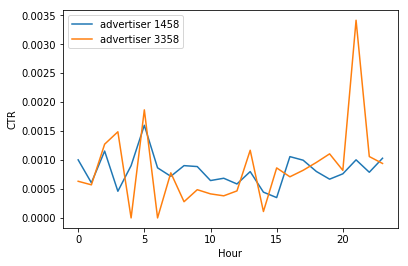

In [324]:
x=hour_ad1458['hour']
y1=hour_ad1458['CTR']
y2=hour_ad3358['CTR']
plt.figure(figsize=(6,4))
plt.plot(x, y1,label="advertiser 1458")
plt.plot(x, y2,label="advertiser 3358")
plt.xlabel('Hour')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [325]:
weekday=traindf.groupby(['advertiser','weekday'], as_index=False).sum()
weekday['CTR']=weekday['click']/weekday['impressions']
weekday_ad1458=weekday[weekday['advertiser']==1458]
weekday_ad3358=weekday[weekday['advertiser']==3358]

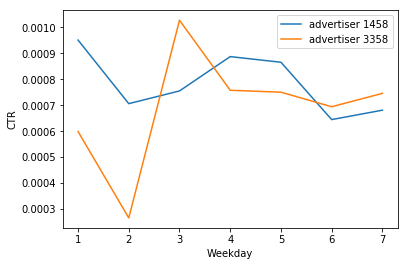

In [326]:
x=list(np.arange(1,8))
temp=list(weekday_ad1458['CTR'])
y1=temp[1:7]+[temp[0]]
temp=list(weekday_ad3358['CTR'])
y2=temp[1:7]+[temp[0]]

plt.plot(x, y1,label="advertiser 1458")
plt.plot(x, y2,label="advertiser 3358")
plt.xlabel('Weekday')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [199]:
useragent=pd.concat([traindf,traindf['useragent'].str.split(r'_',expand=True)],axis=1)
useragent.rename(columns={0:'os',1:'browser'}, inplace=True)

In [202]:
os=useragent.groupby(['advertiser','os'], as_index=False).sum()
os['CTR']=os['click']/os['impressions']

In [203]:
os_ad1458=os[os['advertiser']==1458]
os_ad3358=os[os['advertiser']==3358]

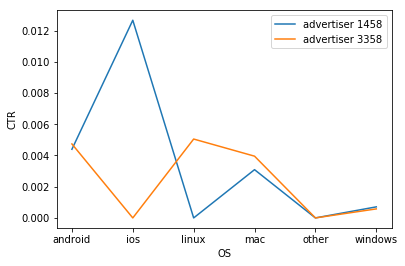

In [207]:
x=np.arange(6)
xticks1=list(os_ad1458['os'])
y1=os_ad1458['CTR']
y2=os_ad3358['CTR']

plt.plot(x, y1,label="advertiser 1458")
plt.xticks(x,xticks1,rotation=0)
plt.plot(x, y2,label="advertiser 3358")
plt.xticks(x,xticks1,rotation=0)

plt.xlabel('OS')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [208]:
browser=useragent.groupby(['advertiser','browser'], as_index=False).sum()
browser['CTR']=browser['click']/browser['impressions']

In [210]:
browser_ad1458=browser[browser['advertiser']==1458]
browser_ad3358=browser[browser['advertiser']==3358]

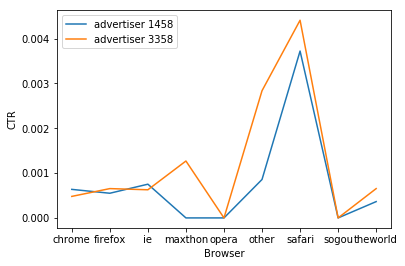

In [211]:
x=np.arange(9)
xticks1=list(browser_ad1458['browser'])
y1=browser_ad1458['CTR']
y2=browser_ad3358['CTR']

plt.plot(x, y1,label="advertiser 1458")
plt.xticks(x,xticks1,rotation=0)
plt.plot(x, y2,label="advertiser 3358")
plt.xticks(x,xticks1,rotation=0)

plt.xlabel('Browser')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [212]:
region=traindf.groupby(['advertiser','region'], as_index=False).sum()
region['CTR']=region['click']/region['impressions']

In [213]:
region_ad1458=region[region['advertiser']==1458]
region_ad3358=region[region['advertiser']==3358]

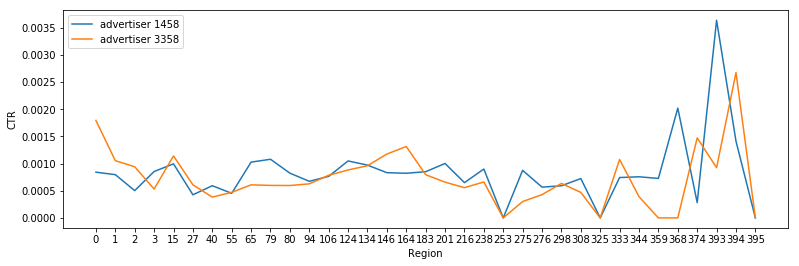

In [222]:
x=np.arange(len(region_ad1458['region']))
xticks1=list(region_ad1458['region'])
y1=region_ad1458['CTR']
y2=region_ad3358['CTR']

plt.figure(figsize=(13,4))
plt.plot(x, y1,label="advertiser 1458")
plt.xticks(x,xticks1,rotation=0)
plt.plot(x, y2,label="advertiser 3358")
plt.xticks(x,xticks1,rotation=0)

plt.xlabel('Region')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [228]:
traindf['slotsize']=list(traindf.apply(lambda x: "*".join([str(x['slotheight']),str(x['slotwidth'])]),axis=1))
slotsize=traindf.groupby(['advertiser','slotsize'], as_index=False).sum()
slotsize['CTR']=slotsize['click']/slotsize['impressions']

In [230]:
slotsize_ad1458=slotsize[slotsize['advertiser']==1458]
slotsize_ad3358=slotsize[slotsize['advertiser']==3358]

In [249]:
x1=slotsize_ad1458['slotsize']
x2=slotsize_ad3358['slotsize']
xticks1=list(set(list(x1)+list(x2)))
xticks1=pd.DataFrame(xticks1)
xticks1.rename(columns={0:'slotsize'}, inplace=True)

In [257]:
temp1=pd.merge(xticks1, slotsize_ad1458[['slotsize','CTR']], how='left', on='slotsize')

In [258]:
temp1=temp1.fillna(0.)

In [262]:
temp2=pd.merge(xticks1, slotsize_ad3358[['slotsize','CTR']], how='left', on='slotsize')

In [263]:
temp2=temp2.fillna(0.)

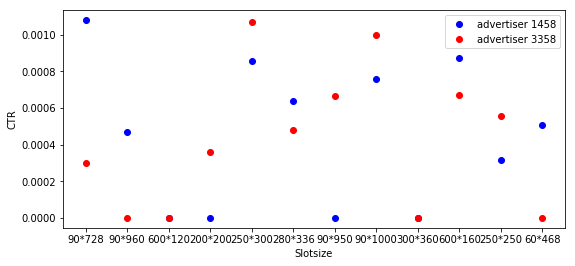

In [276]:
xticks1=list(temp1['slotsize'])
x=np.arange(len(xticks1))
y1=list(temp1['CTR'])
y2=list(temp2['CTR'])

plt.figure(figsize=(9,4))
plt.plot(x, y1,'bo',label="advertiser 1458")
plt.xticks(x,xticks1,rotation=0)
plt.plot(x, y2,'ro',label="advertiser 3358")
plt.xticks(x,xticks1,rotation=0)

plt.xlabel('Slotsize')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [274]:
adexchange=traindf.groupby(['advertiser','adexchange'], as_index=False).sum()
adexchange['CTR']=adexchange['click']/adexchange['impressions']

In [275]:
adexchange_ad1458=adexchange[adexchange['advertiser']==1458]
adexchange_ad3358=adexchange[adexchange['advertiser']==3358]

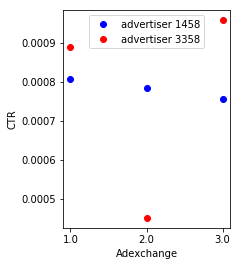

In [308]:
x=np.arange(len(adexchange_ad1458['adexchange']))
xticks1=list(adexchange_ad1458['adexchange'])
y1=adexchange_ad1458['CTR']
y2=adexchange_ad3358['CTR']

plt.figure(figsize=(3,4))
plt.plot(x, y1,'bo',label="advertiser 1458")
plt.xticks(x,xticks1,rotation=0)
plt.plot(x, y2,'ro',label="advertiser 3358")
plt.xticks(x,xticks1,rotation=0)

plt.xlabel('Adexchange')
plt.ylabel('CTR')
plt.legend()
plt.show()

analyze usertag

In [280]:
usertag_ad1458=traindf[traindf['advertiser']==1458]
usertag_ad3358=traindf[traindf['advertiser']==3358]

In [344]:
def one_hot_encoder_usertag(data):
    data_usertag=data.usertag.fillna('0')
    data_usertag=data_usertag.str.replace(',',' ')
    vect=CountVectorizer()
    usertag_vect=vect.fit_transform(data_usertag)
    usertag=data.join(pd.DataFrame(usertag_vect.toarray(),columns=vect.get_feature_names()))
    columns=vect.get_feature_names()
    return usertag,columns

In [288]:
usertagad1458,columnsad1458=one_hot_encoder_usertag(usertag_ad1458)
usertagad3358,columnsad3358=one_hot_encoder_usertag(usertag_ad3358)

In [295]:
columnsad1458==columnsad3358

True

In [300]:
usertag_ad1458_ctr=[]
usertag_ad3358_ctr=[]

In [301]:
for usertag in columnsad1458:
    df=usertagad1458[usertagad1458[usertag]==1]
    click=np.sum(df['click'])
    impression=df.shape[0]
    ctr=click/impression
    usertag_ad1458_ctr.append(ctr)

In [302]:
for usertag in columnsad3358:
    df=usertagad3358[usertagad3358[usertag]==1]
    click=np.sum(df['click'])
    impression=df.shape[0]
    ctr=click/impression
    usertag_ad3358_ctr.append(ctr)

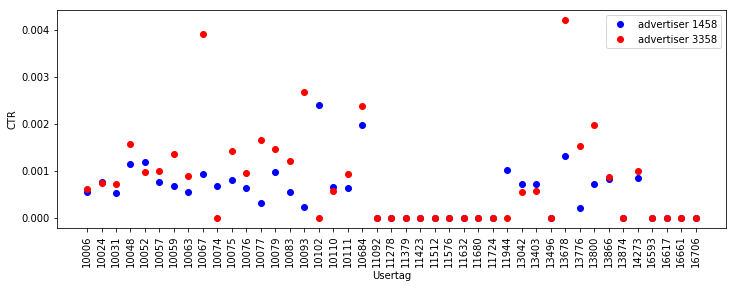

In [309]:
x=np.arange(len(columnsad1458))
xticks1=list(columnsad1458)

plt.figure(figsize=(12,4))
plt.plot(x, usertag_ad1458_ctr,'bo',label="advertiser 1458")
plt.xticks(x,xticks1,rotation=90)
plt.plot(x, usertag_ad3358_ctr,'ro',label="advertiser 3358")
plt.xticks(x,xticks1,rotation=90)

plt.xlabel('Usertag')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [327]:
hour=traindf.groupby(['advertiser','hour'], as_index=False).sum()
hour['Market Price']=hour['payprice']/hour['impressions']
hour_ad1458=hour[hour['advertiser']==1458]
hour_ad3427=hour[hour['advertiser']==3427]

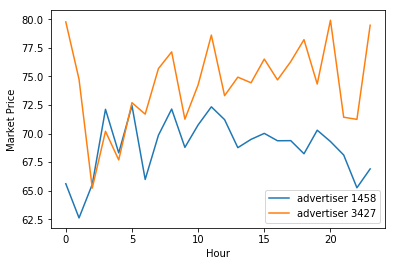

In [330]:
x=hour_ad1458['hour']
y1=hour_ad1458['Market Price']
y2=hour_ad3427['Market Price']
plt.figure(figsize=(6,4))
plt.plot(x, y1,label="advertiser 1458")
plt.plot(x, y2,label="advertiser 3427")
plt.xlabel('Hour')
plt.ylabel('Market Price')
plt.legend()
plt.show()

In [331]:
weekday=traindf.groupby(['advertiser','weekday'], as_index=False).sum()
weekday['Market Price']=weekday['payprice']/weekday['impressions']
weekday_ad1458=weekday[weekday['advertiser']==1458]
weekday_ad3427=weekday[weekday['advertiser']==3427]

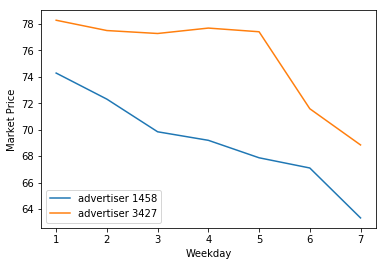

In [332]:
x=list(np.arange(1,8))
temp=list(weekday_ad1458['Market Price'])
y1=temp[1:7]+[temp[0]]
temp=list(weekday_ad3427['Market Price'])
y2=temp[1:7]+[temp[0]]

plt.plot(x, y1,label="advertiser 1458")
plt.plot(x, y2,label="advertiser 3427")
plt.xlabel('Weekday')
plt.ylabel('Market Price')
plt.legend()
plt.show()

In [334]:
region=traindf.groupby(['advertiser','region'], as_index=False).sum()
region['Market Price']=region['payprice']/region['impressions']
region_ad1458=region[region['advertiser']==1458]
region_ad3427=region[region['advertiser']==3427]

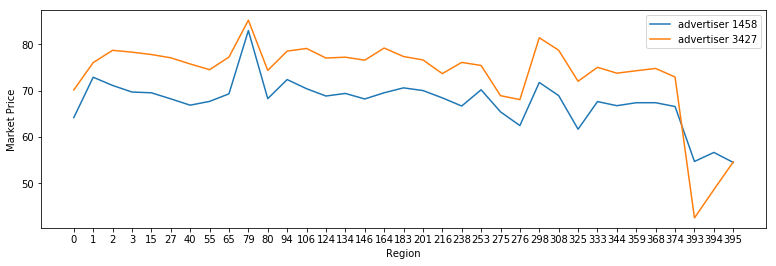

In [335]:
x=np.arange(len(region_ad1458['region']))
xticks1=list(region_ad1458['region'])
y1=region_ad1458['Market Price']
y2=region_ad3427['Market Price']

plt.figure(figsize=(13,4))
plt.plot(x, y1,label="advertiser 1458")
plt.xticks(x,xticks1,rotation=0)
plt.plot(x, y2,label="advertiser 3427")
plt.xticks(x,xticks1,rotation=0)

plt.xlabel('Region')
plt.ylabel('Market Price')
plt.legend()
plt.show()

In [340]:
usertag_ad1458=traindf[traindf['advertiser']==1458]
usertag_ad3427=traindf[traindf['advertiser']==3427]

In [345]:
usertagad1458,columnsad1458=one_hot_encoder_usertag(usertag_ad1458)
usertagad3427,columnsad3427=one_hot_encoder_usertag(usertag_ad3427)

In [346]:
columnsad1458==columnsad3427

True

In [356]:
usertag_ad1458_marketprice=[]
usertag_ad3427_marketprice=[]

In [357]:
for usertag in columnsad1458:
    df=usertagad1458[usertagad1458[usertag]==1]
    payprice=np.sum(df['payprice'])
    impression=df.shape[0]
    marketprice=payprice/impression
    usertag_ad1458_marketprice.append(marketprice)

In [358]:
for usertag in columnsad3427:
    df=usertagad3427[usertagad3427[usertag]==1]
    payprice=np.sum(df['payprice'])
    impression=df.shape[0]
    marketprice=payprice/impression
    usertag_ad3427_marketprice.append(marketprice)

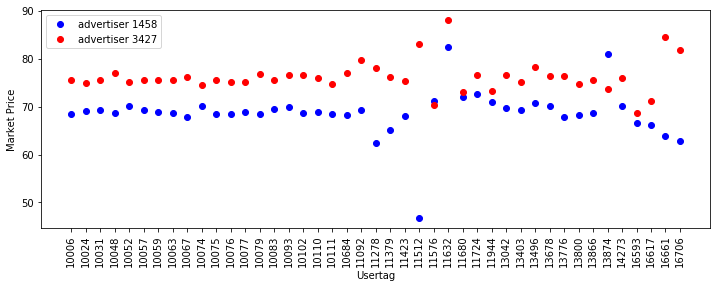

In [360]:
x=np.arange(len(columnsad1458))
xticks1=list(columnsad1458)

plt.figure(figsize=(12,4))
plt.plot(x, usertag_ad1458_marketprice,'bo',label="advertiser 1458")
plt.xticks(x,xticks1,rotation=90)
plt.plot(x, usertag_ad3427_marketprice,'ro',label="advertiser 3427")
plt.xticks(x,xticks1,rotation=90)

plt.xlabel('Usertag')
plt.ylabel('Market Price')
plt.legend()
plt.show()

# Preprocess Data

In [5]:
def preprocessData(data):
    click=data['click']
    weekday=pd.get_dummies(data['weekday'],prefix='weekday_')
    hour=pd.get_dummies(data['hour'],prefix='hour_')
    useragent=pd.get_dummies(data['useragent'],prefix='useragent_')
    region=pd.get_dummies(data['region'],prefix='region_')
    city=pd.get_dummies(data['city'],prefix='city_')
    adexchange=pd.get_dummies(data['adexchange'],prefix='adexchange_')
    slotwidth=pd.get_dummies(data['slotwidth'],prefix='slotwidth_')
    slotheight=pd.get_dummies(data['slotheight'],prefix='slotheight_')
    slotvisibility=pd.get_dummies(data['slotvisibility'],prefix='slotvisibility_')
    slotformat=pd.get_dummies(data['slotformat'],prefix='slotformat_')
    slotprice=data['slotprice']
    creative=pd.get_dummies(data['creative'],prefix='creative_')
    keypage=pd.get_dummies(data['keypage'],prefix='keypage_')
    advertiser=pd.get_dummies(data['advertiser'],prefix='advertiser_')
    
    data_usertag=data.usertag.fillna('0')
    data_usertag=data_usertag.str.replace(',',' ')
    vect=CountVectorizer()
    data_usertag_vect=vect.fit_transform(data_usertag)
    usertag=pd.DataFrame(data_usertag_vect.toarray(),columns=vect.get_feature_names())
    
    newdata=pd.concat([click,weekday,hour,useragent,region,city,adexchange,\
                       slotwidth,slotheight,slotvisibility,slotformat,\
                       slotprice,creative,keypage,advertiser,usertag],axis=1)
    
    return newdata

In [6]:
def preprocessTestData(data):
    weekday=pd.get_dummies(data['weekday'],prefix='weekday_')
    hour=pd.get_dummies(data['hour'],prefix='hour_')
    useragent=pd.get_dummies(data['useragent'],prefix='useragent_')
    region=pd.get_dummies(data['region'],prefix='region_')
    city=pd.get_dummies(data['city'],prefix='city_')
    adexchange=pd.get_dummies(data['adexchange'],prefix='adexchange_')
    slotwidth=pd.get_dummies(data['slotwidth'],prefix='slotwidth_')
    slotheight=pd.get_dummies(data['slotheight'],prefix='slotheight_')
    slotvisibility=pd.get_dummies(data['slotvisibility'],prefix='slotvisibility_')
    slotformat=pd.get_dummies(data['slotformat'],prefix='slotformat_')
    slotprice=data['slotprice']
    creative=pd.get_dummies(data['creative'],prefix='creative_')
    keypage=pd.get_dummies(data['keypage'],prefix='keypage_')
    advertiser=pd.get_dummies(data['advertiser'],prefix='advertiser_')
    
    data_usertag=data.usertag.fillna('0')
    data_usertag=data_usertag.str.replace(',',' ')
    vect=CountVectorizer()
    data_usertag_vect=vect.fit_transform(data_usertag)
    usertag=pd.DataFrame(data_usertag_vect.toarray(),columns=vect.get_feature_names())
    
    newdata=pd.concat([weekday,hour,useragent,region,city,adexchange,\
                       slotwidth,slotheight,slotvisibility,slotformat,\
                       slotprice,creative,keypage,advertiser,usertag],axis=1)
    
    return newdata

In [7]:
train_processed=preprocessData(train)

In [8]:
validation_processed=preprocessData(validation)

In [9]:
test_processed=preprocessTestData(test)

In [244]:
print('Number of features in processed training set',len(train_processed.columns))
print('Number of features in processed validation set',len(validation_processed.columns))
print('Number of features in processed test set',len(test_processed.columns))

Number of features in processed training set 756
Number of features in processed validation set 751
Number of features in processed test set 748


In [13]:
train_features=list(train_processed)
validation_features=list(validation_processed)
test_features=list(test_processed)

In [97]:
print(list(set(train_features)-set(validation_features)))
print(list(set(validation_features)-set(train_features)))
print(list(set(train_features)-set(test_features)))
print(list(set(test_features)-set(train_features)))

['useragent__android_maxthon', 'creative__7324', 'useragent__other_firefox', 'creative__7332', 'useragent__android_ie']
[]
['click', 'useragent__mac_sogou', 'useragent__linux_ie', 'creative__7324', 'useragent__other_firefox', 'creative__7327', 'useragent__android_ie', 'useragent__mac_maxthon']
[]


In [10]:
city=pd.get_dummies(train['city'],prefix='city_')

In [11]:
creative=pd.get_dummies(train['creative'],prefix='creative_')

In [372]:
remove_features=['click', 'useragent__android_maxthon', 'useragent__linux_ie', 'creative__7324', 'useragent__other_firefox',\
                 'creative__7332', 'creative__7327', 'useragent__android_ie', 'useragent__mac_sogou', 'useragent__mac_maxthon']\
                +list(city)+list(creative)
feature=[]
for i in train_features:
    if(i not in remove_features):
        feature.append(i)

In [373]:
len(feature)

248

In [100]:
print(list(set(feature)-set(validation_features)))
print(list(set(validation_features)-set(feature)))
print(list(set(feature)-set(test_features)))
print(list(set(test_features)-set(feature)))

[]
['click', 'useragent__mac_sogou', 'useragent__linux_ie', 'creative__7327', 'useragent__mac_maxthon']
[]
['useragent__android_maxthon', 'creative__7332']


In [18]:
train_processed.click.value_counts()

0    2429188
1       1793
Name: click, dtype: int64

In [19]:
validation.click.value_counts()

0    303723
1       202
Name: click, dtype: int64

# Train Model

In [16]:
downsampling_rate=0.025

In [17]:
train_not_clicked = train_processed[train_processed.click == 0].sample(n= round(downsampling_rate*2429188), random_state = 2)
train_clicked = train_processed[train_processed.click == 1]
train_sample = pd.concat([train_clicked,train_not_clicked],0)

In [374]:
train_set=train_sample[feature]
train_label=train_sample['click']
validation_set=validation_processed[feature]
validation_label=validation_processed['click']
test_set=test_processed[feature]

### Logistic Regression

In [367]:
lr_model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, \
                              intercept_scaling=1, class_weight='balanced', random_state=None, solver='liblinear', \
                              max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [375]:
lr_model.fit(train_set,train_label)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [376]:
lr_pred_ctr=[]
for a, b in lr_model.predict_proba(validation_set):
    lr_pred_ctr.append(b)
auc=roc_auc_score(validation_label, lr_pred_ctr)
print('AUC:',auc)

AUC: 0.845218796778


feature 746 AUC: 0.82437743804
feature no city AUC: 0.840911572859
feature no city no creative AUC: 0.845218796778

### Extra Tree

In [217]:
etc_model = ExtraTreesClassifier(n_estimators=1000, criterion='gini', max_depth=6, min_samples_split=2,\
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', \
                                 max_leaf_nodes=None, min_impurity_decrease=1e-07,\
                                 bootstrap=False, oob_score=False, n_jobs=1, random_state=None, verbose=0, \
                                 warm_start=False, class_weight='balanced')
etc_model.fit(train_set,train_label)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=6, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=1e-07,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [218]:
etc_pred_ctr = []
for a, b in etc_model.predict_proba(validation_set):
    etc_pred_ctr.append(b)

auc_etcf = roc_auc_score(validation_label, etc_pred_ctr)
print('AUC:', auc_etcf)

AUC: 0.832280116624


feature 746 AUC: 0.847089280446
feature no city no creative max_depth=20 AUC: 0.851346351188
feature no city no creative max_depth=6 AUC: 0.832280116624

### XGBoost

In [385]:
xgb_model=XGBClassifier(booster='gbtree', objective='binary:logistic', max_depth=6, n_estimators=100,\
                       n_jobs=8, slient=False)

In [386]:
xgb_model.fit(train_set, train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=8, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, slient=False, subsample=1)

In [387]:
xgb_pred_ctr=[]
for a, b in xgb_model.predict_proba(validation_set):
    xgb_pred_ctr.append(b)

xgb_auc=roc_auc_score(validation_label, xgb_pred_ctr)
print('AUC:', xgb_auc)

AUC: 0.892518229954


feature 746 max_depth=20 n_estimators=1000 AUC: 0.848667459273 clicks 161,178 criterion2 120
feature 746 max_depth=6 AUC: 0.872048293222
feature 746 max_depth=6 n_estimators=100 AUC: 0.889790154676 clicks 163,178 criterion2 27
feature no city no creative max_depth=20 AUC: 0.840199909552
feature no city no creative max_depth=10 AUC: 0.854877896004
feature no city no creative max_depth=6 n_estimators=100 AUC: 0.870445494189

In [196]:
fig, ax = plt.subplots(figsize=(12,100))
xgb.plot_importance(xgb_model,height=100,ax=ax)

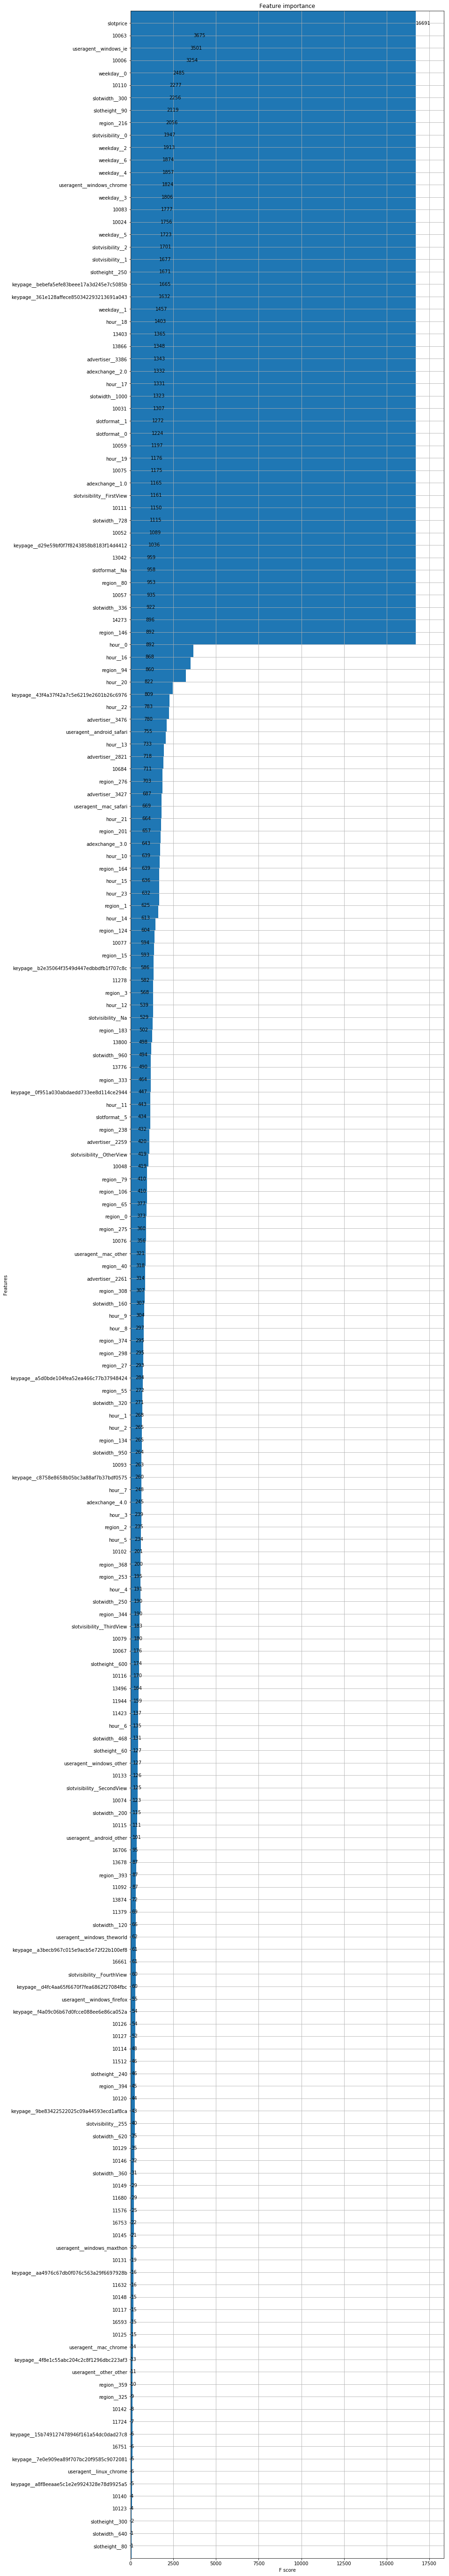

In [197]:
plt.show()

# Evaluation

In [25]:
def bid_linear(base_bid, p_ctr, avg_ctr):
    return (base_bid*p_ctr/avg_ctr)

In [133]:
def bid_quadratic(base_bid, p_ctr, avg_ctr):
    return (base_bid*p_ctr/avg_ctr+base_bid*base_bid*p_ctr*p_ctr/avg_ctr)

In [32]:
def bid_ortb(c_para, p_ctr, lambda_para):
    return np.sqrt(c_para/lambda_para*p_ctr+c_para**2)-c_para

In [122]:
def bid_ortb2(c_para, p_ctr, lambda_para):
    return c_para*(((p_ctr+np.sqrt((c_para**2)*(lambda_para**2)+p_ctr**2))/(c_para*lambda_para))**(1/3)-((c_para*lambda_para)/(p_ctr+np.sqrt((c_para**2)*(lambda_para**2)+p_ctr**2)))**(1/3))

In [382]:
def evaluate(bidprice):
    budget=6250
    impression=0
    click=0
    for row in range(0,validation.shape[0]):
        if budget<validation.payprice[row]:
            continue
        if bidprice.iloc[row,0]>validation.payprice[row]:
            budget=budget-validation.payprice[row]/1000
            impression=impression+1
            if validation.click[row]==1:
                click=click+1
    return click,(6250-budget),(click/impression),((6250-budget)/impression),((6250-budget)/click)

In [27]:
def pred_ctr_calibration(pred_ctr):
    return pred_ctr/(pred_ctr+(1-pred_ctr)/downsampling_rate)

In [28]:
number_of_click=len(train[train.click==1])
number_of_impression=len(train[train.bidprice>train.payprice])

### Logistic Regression Evaluation

In [377]:
avg_ctr=number_of_click/number_of_impression
predCTR=pd.DataFrame(lr_pred_ctr)
predCTR_calibrated=pred_ctr_calibration(predCTR)

In [383]:
for counter in np.arange(3,4,0.1):
    base_bid=counter
    bidprice=bid_linear(base_bid, predCTR_calibrated, avg_ctr)
    click,cost,CTR,CPM,CPC=evaluate(bidprice)
    print('basebid ', base_bid, ' click ', click, ' cost ', cost, ' CTR ', CTR, ' CPM ', CPM, ' CPC ', CPC)

basebid  3.0  click  155  cost  5331.392  CTR  0.0014015987268058017  CPM  0.0482094983181  CPC  34.3960774194
basebid  3.1  click  156  cost  5504.535  CTR  0.0013776415835813382  CPM  0.0486107456044  CPC  35.2854807692
basebid  3.2  click  158  cost  5678.198  CTR  0.0013635618306249084  CPM  0.0490036332882  CPC  35.9379620253
basebid  3.3  click  158  cost  5849.315  CTR  0.0013339412052749777  CPM  0.0493838120325  CPC  37.0209810127
basebid  3.4  click  160  cost  6014.338  CTR  0.0013233749369329132  CPM  0.0497451510715  CPC  37.5896125
basebid  3.5  click  161  cost  6156.859  CTR  0.0013058854065278048  CPM  0.0499388342742  CPC  38.2413602485
basebid  3.6  click  157  cost  6213.409  CTR  0.0012600927813538373  CPM  0.0498692473153  CPC  39.5758535032
basebid  3.7  click  153  cost  6231.104  CTR  0.001225146737346156  CPM  0.04989553422  CPC  40.7261699347
basebid  3.8  click  152  cost  6236.273  CTR  0.0012196883375326989  CPM  0.0500415095248  CPC  41.0281118421
basebid

### Extra Tree Evaluation

In [184]:
avg_ctr=number_of_click/number_of_impression
predCTR=pd.DataFrame(etc_pred_ctr)
predCTR_calibrated=pred_ctr_calibration(predCTR)

In [192]:
for counter in np.arange(6,7,0.1):
    base_bid=counter
    bidprice=bid_linear(base_bid, predCTR_calibrated, avg_ctr)
    print('basebid ',base_bid, ' click ', evaluate(bidprice))

basebid  6.0  click  154
basebid  6.1  click  154
basebid  6.2  click  154
basebid  6.3  click  156
basebid  6.4  click  157
basebid  6.5  click  157
basebid  6.6  click  155
basebid  6.7  click  152
basebid  6.8  click  148
basebid  6.9  click  147


### XGBoost Evaluation

In [388]:
avg_ctr=number_of_click/number_of_impression
lambda_para=5.2*10**(-7)
predCTR=pd.DataFrame(xgb_pred_ctr)
pred_calibrated=pred_ctr_calibration(predCTR)

In [389]:
for counter in np.arange(123,132,1):
    base_bid=counter
    bidprice=bid_linear(base_bid, pred_calibrated, avg_ctr)
    print('basebid ', base_bid, ' click ', evaluate(bidprice))

basebid  123  click  (165, 5739.7630000026757, 0.0013069617495861288, 0.045464549652686211, 34.786442424258638)
basebid  124  click  (165, 5784.4650000026559, 0.0012998164501618861, 0.045568137953873503, 35.057363636379733)
basebid  125  click  (165, 5832.2740000026479, 0.00129252606594233, 0.045687067689219138, 35.347115151531199)
basebid  126  click  (165, 5884.5650000026299, 0.0012845665171898357, 0.045812819195336869, 35.664030303046239)
basebid  127  click  (165, 5938.0870000026352, 0.0012767537954408283, 0.045948334029764885, 35.988406060622033)
basebid  128  click  (165, 5988.2820000026222, 0.001269611652726587, 0.046077530951613349, 36.292618181834072)
basebid  129  click  (165, 6035.9320000026082, 0.0012625393108830888, 0.04618546319891198, 36.581406060621866)
basebid  130  click  (165, 6082.8650000025937, 0.0012556026512240224, 0.046288857097218604, 36.865848484864202)
basebid  131  click  (166, 6123.2350000025854, 0.0012571567053406441, 0.04637268637728776, 36.88695783134087

In [85]:
bidprice=bid_linear(2500, pred_calibrated, avg_ctr)
print('basebid ', 2500, ' click ', evaluate(bidprice))

basebid  2500  click  161


In [391]:
for counter in np.arange(120,135,5):
    base_bid=counter
    bidprice=bid_quadratic(base_bid, pred_calibrated, avg_ctr)
    print('basebid ', base_bid, ' click ', evaluate(bidprice))

basebid  120  click  (165, 5981.4960000025867, 0.0012872723868370547, 0.046665543228967425, 36.251490909106586)
basebid  125  click  (165, 6195.0590000025195, 0.001253513636708957, 0.047064187495270984, 37.545812121227392)
basebid  130  click  (154, 6232.1110000024755, 0.0011654658836350426, 0.047164368529412692, 40.468253246769322)


In [390]:
for c_para in np.arange(200, 240, 20):
    bidprice=bid_ortb2(c_para,pred_calibrated,lambda_para)
    print('c_para ', c_para, ' click ', evaluate(bidprice))

c_para  200  click  (59, 6246.5750000010248, 0.0006443932327788639, 0.068224587424513428, 105.87415254239025)
c_para  220  click  (58, 6246.577000001017, 0.0006372435918564664, 0.068630882142907551, 107.6996034482934)


### Test 

In [44]:
train.click.value_counts()

0    2429188
1       1793
Name: click, dtype: int64

In [45]:
validation.click.value_counts()

0    303723
1       202
Name: click, dtype: int64

In [110]:
xgb_pred_ctr_testset=[]
for a, b in xgb_model.predict_proba(test_set):
    xgb_pred_ctr_testset.append(b)

In [111]:
avg_ctr=number_of_click/number_of_impression
predCTR_testset=pd.DataFrame(xgb_pred_ctr_testset)
pred_calibrated_testset=pred_ctr_calibration(predCTR_testset)

In [112]:
base_bid=128
bidprice_testset=bid_linear(base_bid, pred_calibrated_testset, avg_ctr)

In [117]:
group_8=pd.read_csv('D:\\web_economics_data\\Group_8.csv')

In [118]:
group_8

,bidid,bidprice
0,366c563de7d90feb9d4dab53e795a93fb3157387,142.683215
1,29167d4caa719788b5a342dbaa25151d53121f80,499.925931
2,ff8bc3f4d44a3ea60c5f3a3a8fbe7cd98fb2966e,13.512301
3,844c2da00d45315f20b748ec131c26ee99a7cbc7,105.672045
4,c6017f0ad0c44d7d0c9b62583ea863f28941c0ca,60.377811
5,7493c42f6d8f29d9f414b75c125ce3db40461ef9,201.436042
6,819fb6958ea48b10430710d009c57d55a31debcb,21.458034
7,8660774f6c94e32dfbd46add8a9bc94df3c74130,148.502322
8,ccc4c75ae4fd33526e5ecdae482c45c1dabc94db,71.211445
9,d9a212303746d85553966e902a315ba8812dd138,68.798152


In [115]:
group_8['bidprice']=bidprice_testset

In [116]:
group_8.to_csv('D:\\web_economics_data\\Group_8.csv',index=False)